In [127]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [128]:
#Loading dataset into iris. Data into X and target label into Y
iris = sklearn.datasets.load_iris()
X = iris.data
y = (iris.target != 0) * 1
print ("X" + str(X.shape) + "  y" + str(y.shape))

X(150, 4)  y(150,)


In [129]:
#Convert Numpy Array to Pandas Dataframe
columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth']
iris_df = pd.DataFrame(data = X, columns = columns)
target = ['Name']
iris_target = pd.DataFrame(data = y, columns = target)
iris_df = iris_df.join(iris_target)
iris_df.Name[iris_df.Name==0] = "Setosa" 
iris_df.Name[iris_df.Name==1] = "Non Setosa"
iris_df.head()

C:\Users\bnama\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


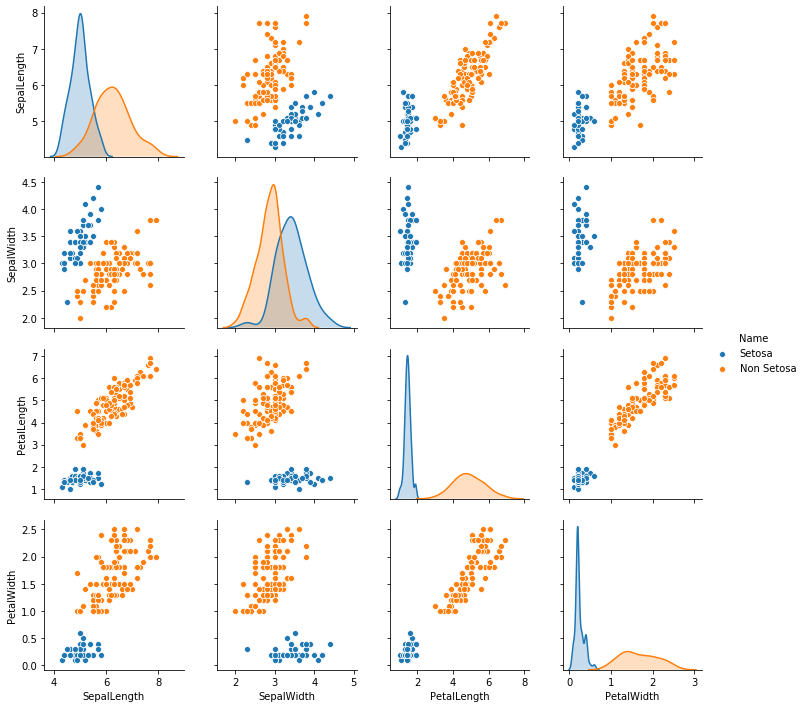

In [130]:
#Visualise the classes
sns.pairplot(iris_df, hue="Name")

From the above plots. it can be observed that the two classes Setosa and Non Setosa are seperable in perfect manner and our goal is to build a Linear Regression model with 100% accuracy

In [131]:
#Splitting data into train and test with 50% size
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [132]:
class regression_algo:
    
    #Initilisation
    def __init__(self, lr=0.01, iter=100000, fit_intercept=True):
        self.lr = lr
        self.iter = iter
        self.fit_intercept = fit_intercept
        
    #Intercept
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    #Sigmoid function
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    #Loss Function
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    #Fitting data into the model
    def fit_data(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)        
        # weights initialization
        self.theta = np.zeros(X.shape[1])        
        for i in range(self.iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient            
            if(i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    #Predict Probability
    def predict_probability(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X) 
        return self.__sigmoid(np.dot(X, self.theta))
    
    #Predict function to test the model on test data
    def predict(self, X, threshold=0.5):
        return self.predict_probability(X) >= threshold

In [133]:
#Apply model on training data with 0.1 as learning rate. 
model = regression_algo(lr=0.1, iter=300000)
model.fit_data(X_train, Y_train)

loss: 0.5051179800715164 	
loss: 0.0010339075551264259 	
loss: 0.0005557167413380687 	
loss: 0.00038544032730126977 	
loss: 0.0002969248805658176 	
loss: 0.00024233467885127391 	
loss: 0.0002051631836324902 	
loss: 0.00017815416096801233 	
loss: 0.00015760575962341816 	
loss: 0.00014142686995736735 	
loss: 0.0001283449060344772 	
loss: 0.00011753998976981666 	
loss: 0.00010845954643489935 	
loss: 0.00010071727654203103 	
loss: 9.40348105048839e-05 	
loss: 8.820636565633182e-05 	
loss: 8.307646432107917e-05 	
loss: 7.8525400981526e-05 	
loss: 7.445948240842348e-05 	
loss: 7.080430429083386e-05 	
loss: 6.750001496482024e-05 	
loss: 6.449791224998314e-05 	
loss: 6.175795460660116e-05 	
loss: 5.924691188422046e-05 	
loss: 5.6936971493183586e-05 	
loss: 5.4804674110717224e-05 	
loss: 5.283009133475039e-05 	
loss: 5.099618336162017e-05 	
loss: 4.928829225762682e-05 	
loss: 4.769373851388175e-05 	


Loss is being reduced gradually and hence our objective function of minimisation is achieved using Gradient Descent.

In [134]:
#Apply model on test data and check for accuracy
pred = model.predict(X_test)
(pred == Y_test).mean()

1.0

In [135]:
#Implementing sklearn pre-defined model
regression_model = LogisticRegression(random_state=42, solver="lbfgs", multi_class="auto")
regression_model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [136]:
#Test accuracy of the results obtained from pre defined model with the newly built model
accuracy = cross_val_score(regression_model, X, y, cv=10,scoring='accuracy')
print (accuracy.mean())

1.0
